# CONTENT
1 .IMPORTING ALL LIBRARIES 

2 .READING THE DATA 

3 .EXPLORATORY DATA ANALYSIS 
    
    3.1 CORRELATION ANALYSIS

4 .MODEL SELECTION 
    
    4.1 DECISION TREE CLASSIFIER 
    
    4.2 RANDOM FOREST CLASSIFIER 
    
    4.3 SUPPORT VECTOR MACHINE 
    
    4.4 KNN CLASSIFIER 
    
    4.5 GAUSSION NAIVE BAYES 
    
    4.6 ADABOOST ENSEMBLE TECHNIQUE 
    
    4.7 GRADIENT BOOSTING 
    
    4.8 XGBOOST CLASSIFIER 
    
    4.9 LIGHT GRADIENT BOOSTING CLASSIFIER 
    
    4.10 LOGISTIC REGRESSION

5 .MODEL EVALUATION

In [1]:
# Importing All Libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
## Reading the data
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Exploratory Data Analysis

In [5]:
## isnull() function detect missing values in the given series object. 
## And here we are using isnull().sum() to detect total number of null values in each column.
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
# There is no null value is present in this dataset but there are some '?' this symbol
# So first we have to replace this symbol
data.replace('?', np.NaN, inplace = True)

In [7]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
## info() function is used to get a concise summary of the dataframe. 
## It comes really handy when doing exploratory analysis of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [10]:
# We have to change the categorical values from object to integer for doing data processing
# For this first we have to remove the null values
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [11]:
# workclass, occupation, native-country has some null values we will just replace this values by most frequent values
# For this we will use mode function
feature = ['workclass', 'occupation', 'native-country']
for features in feature:
    data[features] = data[features].fillna(data[features].mode()[0])

In [12]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [13]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

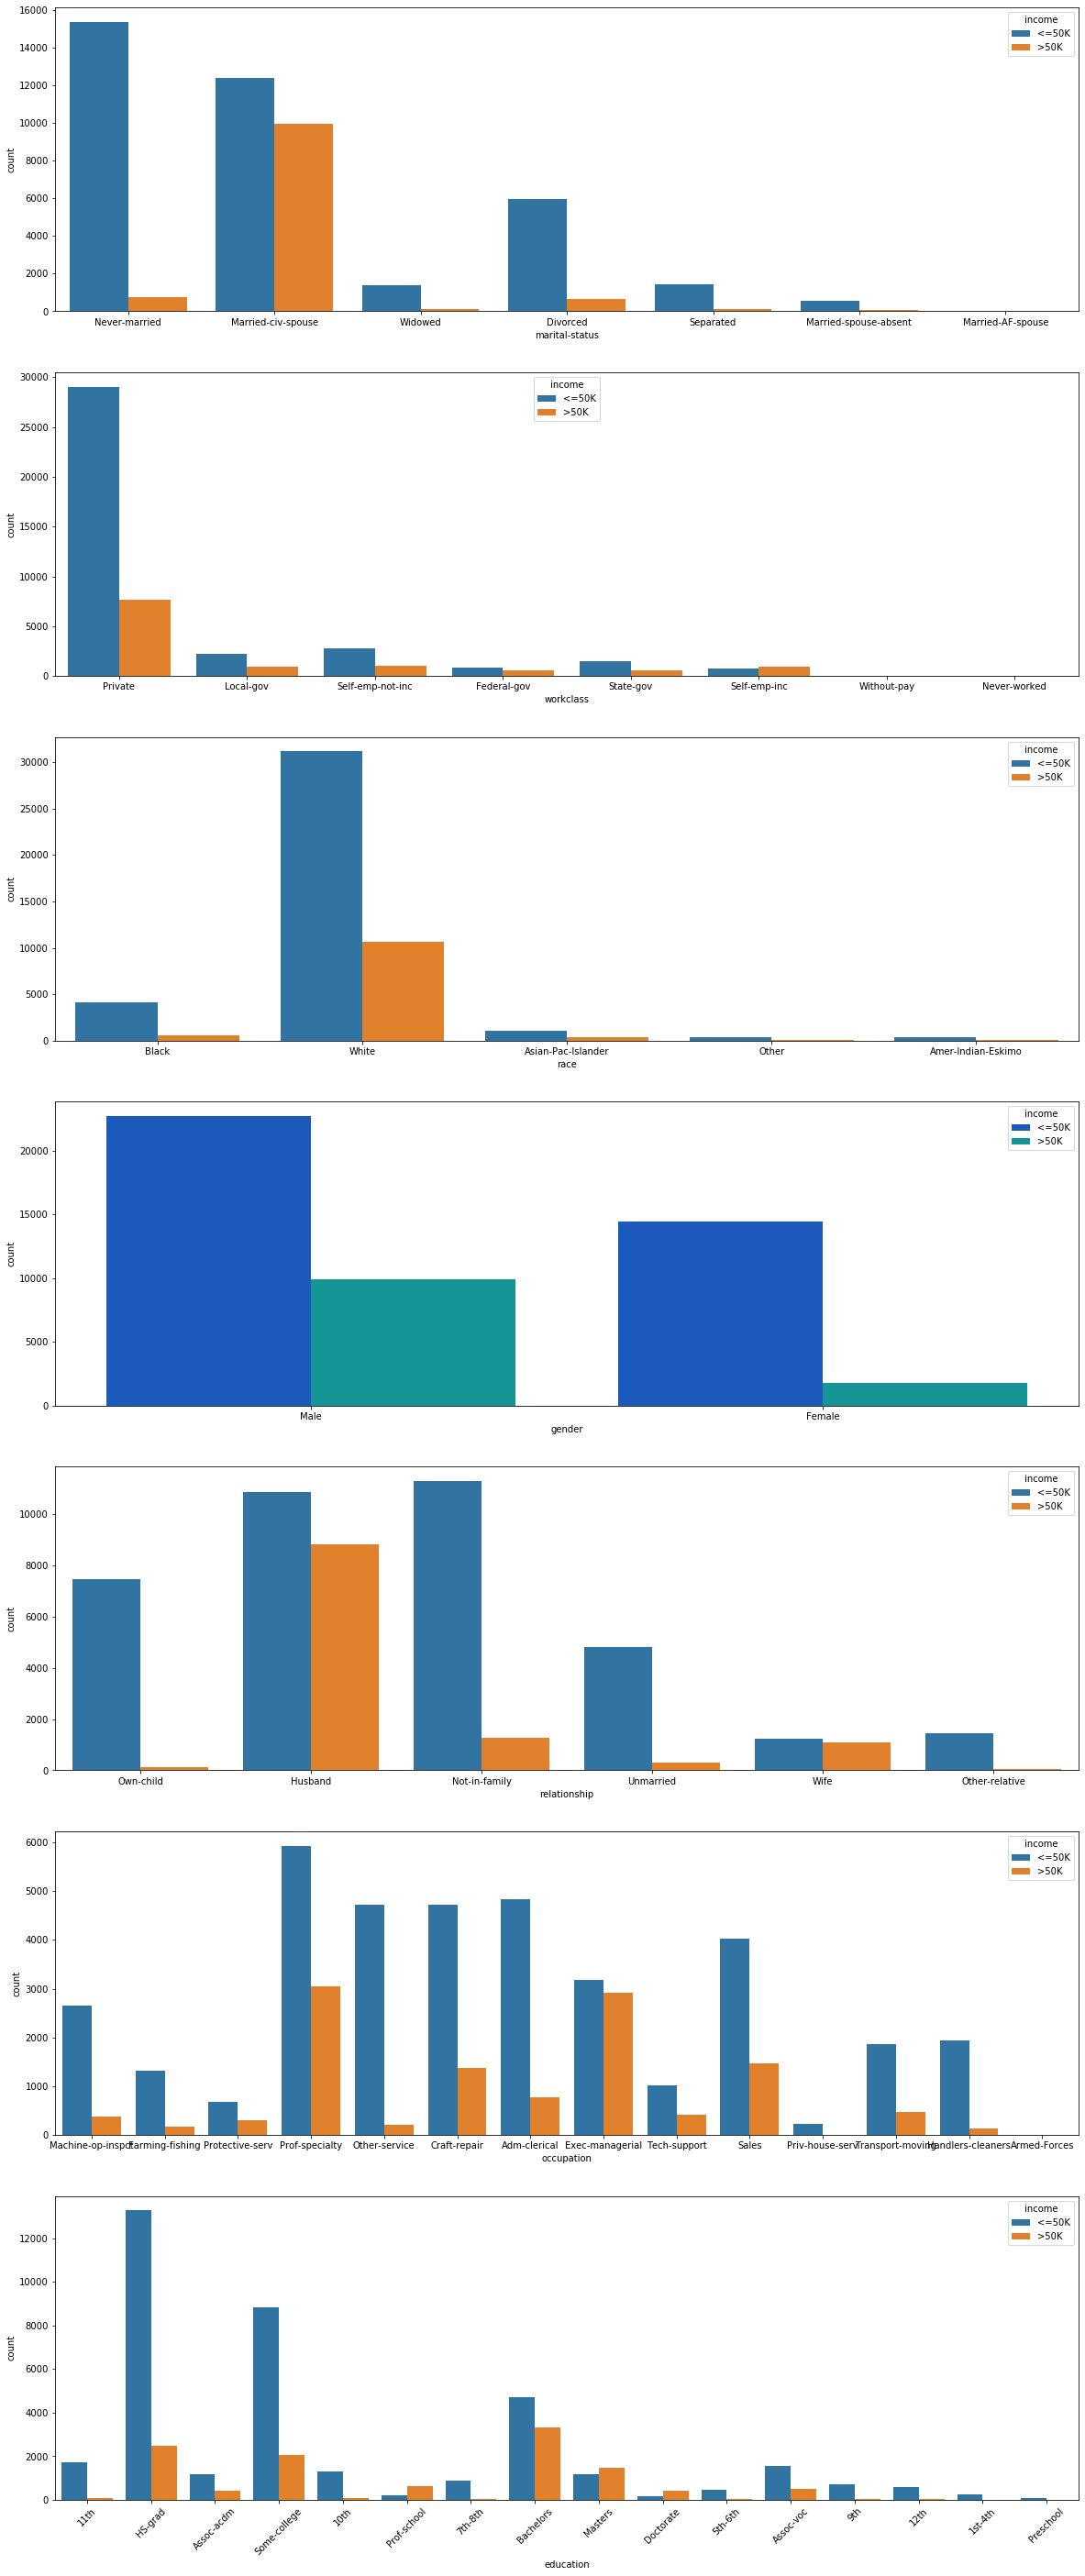

In [14]:
fig, (a,b,c,d,e,f,g) = plt.subplots(7,figsize=(20,50))
plt.xticks(rotation=45)

sns.countplot(x=data['workclass'],hue=data['income'],ax=b)
sns.countplot(data['marital-status'],hue=data['income'], ax=a)
sns.countplot(data['race'],hue=data['income'],ax=c)
sns.countplot(data['gender'],hue=data['income'],ax=d,palette = 'winter')
sns.countplot(data['relationship'],hue=data['income'],ax=e)
sns.countplot(data['occupation'], hue=data['income'], ax=f)
sns.countplot(data['education'], hue=data['income'], ax=g)

## Summary:-
    1.marital_status :-  More than 60% of married people seem to earn salary greater than 50K.
    2.workclass :- Out of all the workclass only 59% self employed people are making salary more than 50K.
    3.Race:- Some White, Black and asain-pac-Islander earn salary more than 50K
    4.Gender:- Out of total male 30% of them earn salary more than 50K while less than 15% female earn more than 50K. 89% female earn less than 50K.
    5.Occupation :- If we check by occupation, Proportion of people making salary less than 50K is higher
    6.education :- People having degree doctorate,prof-school,masters,HS-grad are making salary more than 50K.


Text(0.5, 0, 'Workclass')

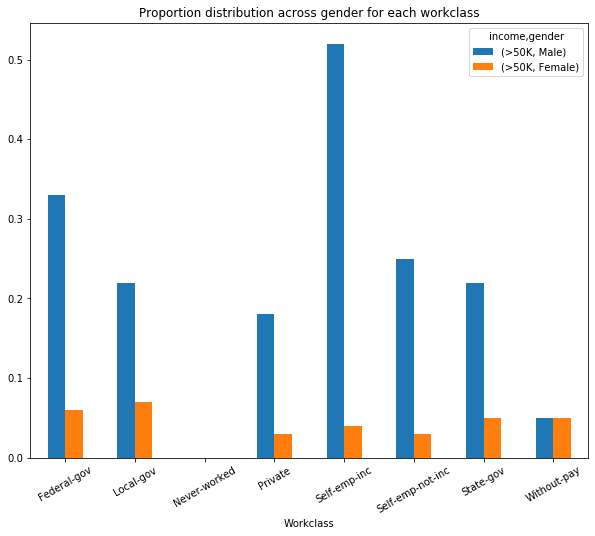

In [15]:
gender_workclass = round(pd.crosstab(data['workclass'], [data['income'], data['gender']]).div(pd.crosstab(data['workclass'], [data['income'], data['gender']]).apply(sum,1),0),2)
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Proportion distribution across gender for each workclass', 
                                                            figsize = (10,8), rot = 30)
plt.xlabel('Workclass')

### We see that man have a higher proportion earning more than 50K a year than women, except for the 'Without-pay' working class, where they have the same proportion

Text(0, 0.5, 'Frequency')

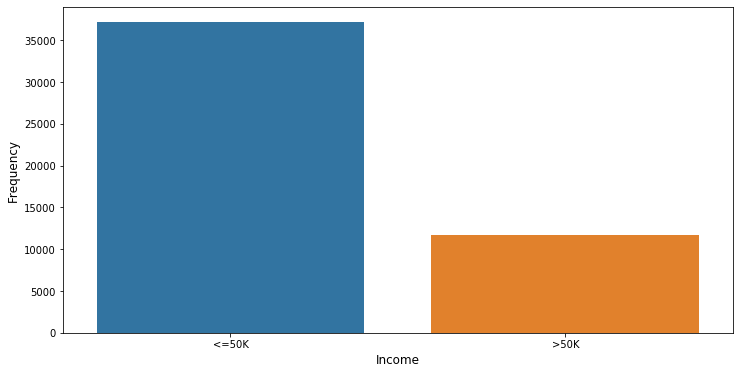

In [16]:
plt.figure(figsize =(12,6))
sns.countplot(x = 'income', data = data)
plt.xlabel("Income",fontsize = 12)
plt.ylabel("Frequency",fontsize = 12)

Our dataset has 35000 people earning <=50K i.e. 75% and remainng 25% earns more than 50K

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [18]:
# Here we are importing LabelEncoder for encoding the features
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['income'] = lb.fit_transform(data.income)

In [19]:
# Here we are going to use ordinal target encoding on country
# It orders the labels according to the target(i.e. mean)
original_labels = data.groupby(['native-country'])['income'].mean().sort_values().index
original_labels

Index(['Holand-Netherlands', 'Guatemala', 'Outlying-US(Guam-USVI-etc)',
       'Columbia', 'Dominican-Republic', 'Mexico', 'Nicaragua', 'El-Salvador',
       'Trinadad&Tobago', 'Vietnam', 'Laos', 'Peru', 'Honduras', 'Puerto-Rico',
       'Haiti', 'Ecuador', 'Jamaica', 'Scotland', 'Thailand', 'South',
       'Portugal', 'Poland', 'United-States', 'Cuba', 'Hong', 'Germany',
       'Philippines', 'China', 'Ireland', 'Hungary', 'Cambodia', 'Italy',
       'Canada', 'Japan', 'Yugoslavia', 'Greece', 'England', 'Iran', 'Taiwan',
       'India', 'France'],
      dtype='object', name='native-country')

In [20]:
# Now we have to give numbers to this ordinal encoded features for that here we are using enumerate function
# Enumerate() method adds a counter to an iterable and returns it in a form of enumerate object. 
# This enumerate object can then be used directly in for loops 

ordinal_label = {k:i for i,k in enumerate(original_labels, 0)}
ordinal_label

{'Holand-Netherlands': 0,
 'Guatemala': 1,
 'Outlying-US(Guam-USVI-etc)': 2,
 'Columbia': 3,
 'Dominican-Republic': 4,
 'Mexico': 5,
 'Nicaragua': 6,
 'El-Salvador': 7,
 'Trinadad&Tobago': 8,
 'Vietnam': 9,
 'Laos': 10,
 'Peru': 11,
 'Honduras': 12,
 'Puerto-Rico': 13,
 'Haiti': 14,
 'Ecuador': 15,
 'Jamaica': 16,
 'Scotland': 17,
 'Thailand': 18,
 'South': 19,
 'Portugal': 20,
 'Poland': 21,
 'United-States': 22,
 'Cuba': 23,
 'Hong': 24,
 'Germany': 25,
 'Philippines': 26,
 'China': 27,
 'Ireland': 28,
 'Hungary': 29,
 'Cambodia': 30,
 'Italy': 31,
 'Canada': 32,
 'Japan': 33,
 'Yugoslavia': 34,
 'Greece': 35,
 'England': 36,
 'Iran': 37,
 'Taiwan': 38,
 'India': 39,
 'France': 40}

In [21]:
# The map() function calls the specified function for each item of an iterable (such as string, list, tuple or dictionary) 
# and returns a list of results.
data['Country_ordinal'] = data['native-country'].map(ordinal_label)

In [22]:
# This function provides unique values
data['capital-gain'].unique()

array([    0,  7688,  3103,  6418,  7298,  3908, 14084,  5178, 15024,
       99999,  2597,  2907,  4650,  6497,  1055,  5013, 27828,  4934,
        4064,  3674,  2174, 10605,  3418,   114,  2580,  3411,  4508,
        4386,  8614, 13550,  6849,  2463,  3137,  2885,  2964,  1471,
       10566,  2354,  1424,  1455,  3325,  4416, 25236,   594,  2105,
        4787,  2829,   401,  4865,  1264,  1506, 10520,  3464,  2653,
       20051,  4101,  1797,  2407,  3471,  1086,  1848, 14344,  1151,
        2993,  2290, 15020,  9386,  2202,  3818,  2176,  5455, 11678,
        7978,  7262,  6514, 41310,  3456,  7430,  2414,  2062, 34095,
        1831,  6723,  5060, 15831,  2977,  2346,  3273,  2329,  9562,
        2635,  4931,  1731,  6097,   914,  7896,  5556,  1409,  3781,
        3942,  2538,  3887, 25124,  7443,  5721,  1173,  4687,  6612,
        6767,  2961,   991,  2036,  2936,  2050,  1111,  2228, 22040,
        3432,  6360,  2009,  1639, 18481,  2387], dtype=int64)

In [23]:
data['capital-loss'].unique()

array([   0, 1721, 1876, 2415, 1887,  625, 1977, 2057, 1429, 1590, 1485,
       2051, 2377, 1672, 1628, 1902, 1602, 1741, 2444, 1408, 2001, 2042,
       1740, 1825, 1848, 1719, 3004, 2179, 1573, 2205, 1258, 2339, 1726,
       2258, 1340, 1504, 2559, 1668, 1974, 1980, 1564, 2547, 2002, 1669,
       1617,  323, 3175, 2472, 2174, 1579, 2129, 1510, 1735, 2282, 1870,
       1411, 1911, 1651, 1092, 1762, 2457, 2231, 2238,  653, 1138, 2246,
       2603, 2392, 1944, 1380, 2465, 1421, 3770, 1594,  213, 2149, 2824,
       1844, 2467, 2163, 1816, 1648, 2206, 2352,  419, 1539,  880,  810,
        974, 4356, 2489, 1755, 3683, 2267, 2080,  155, 3900, 2201, 2754],
      dtype=int64)

In [24]:
# Here we are just storing all categorical values
categorical_feature = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender',
                       'native-country']
# We have to convert these categorical features into integer means
# Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form 
for feature in categorical_feature:
    data[feature] = lb.fit_transform(data[feature])

In [25]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Country_ordinal
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0,22
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0,22
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1,22
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1,22
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,0,22


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int32
 2   fnlwgt           48842 non-null  int64
 3   education        48842 non-null  int32
 4   educational-num  48842 non-null  int64
 5   marital-status   48842 non-null  int32
 6   occupation       48842 non-null  int32
 7   relationship     48842 non-null  int32
 8   race             48842 non-null  int32
 9   gender           48842 non-null  int32
 10  capital-gain     48842 non-null  int64
 11  capital-loss     48842 non-null  int64
 12  hours-per-week   48842 non-null  int64
 13  native-country   48842 non-null  int32
 14  income           48842 non-null  int32
 15  Country_ordinal  48842 non-null  int64
dtypes: int32(9), int64(7)
memory usage: 4.3 MB


In [27]:
# This function gives the correlation between features
data.corr()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Country_ordinal
age,1.000000,0.045643,-0.076628,-0.015058,0.030940,-0.263978,-0.000133,-0.263383,0.028421,0.088120,0.077229,0.056944,0.071558,-0.002622,0.230369,0.055240
workclass,0.045643,1.000000,-0.026519,0.005219,0.007333,-0.020870,0.009841,-0.056073,0.053923,0.066672,0.031558,0.004168,0.042845,-0.004829,-0.000511,0.019153
fnlwgt,-0.076628,-0.026519,1.000000,-0.022570,-0.038761,0.029851,-0.002253,0.009092,-0.027062,0.027739,-0.003706,-0.004366,-0.013519,-0.058534,-0.006339,-0.114106
education,-0.015058,0.005219,-0.022570,1.000000,0.359668,-0.037417,-0.035126,-0.010758,0.013250,-0.027041,0.028928,0.017638,0.057659,0.075339,0.080091,0.114152
educational-num,0.030940,0.007333,-0.038761,0.359668,1.000000,-0.069992,0.072706,-0.090534,0.029239,0.009328,0.125146,0.080972,0.143689,0.090137,0.332613,0.240187
marital-status,-0.263978,-0.020870,0.029851,-0.037417,-0.069992,1.000000,0.030445,0.187800,-0.070104,-0.127479,-0.043969,-0.033872,-0.185567,-0.017919,-0.199072,-0.039155
occupation,-0.000133,0.009841,-0.002253,-0.035126,0.072706,0.030445,1.000000,-0.034964,-0.005210,0.042579,0.014518,0.011082,-0.015550,-0.001577,0.032550,0.019797
relationship,-0.263383,-0.056073,0.009092,-0.010758,-0.090534,0.187800,-0.034964,1.000000,-0.117041,-0.579797,-0.056510,-0.057201,-0.250400,-0.006999,-0.253214,-0.027701
race,0.028421,0.053923,-0.027062,0.013250,0.029239,-0.070104,-0.005210,-0.117041,1.000000,0.086734,0.011581,0.018595,0.039694,0.117553,0.070934,-0.067398
gender,0.088120,0.066672,0.027739,-0.027041,0.009328,-0.127479,0.042579,-0.579797,0.086734,1.000000,0.047094,0.045480,0.228560,-0.002453,0.214628,-0.000267


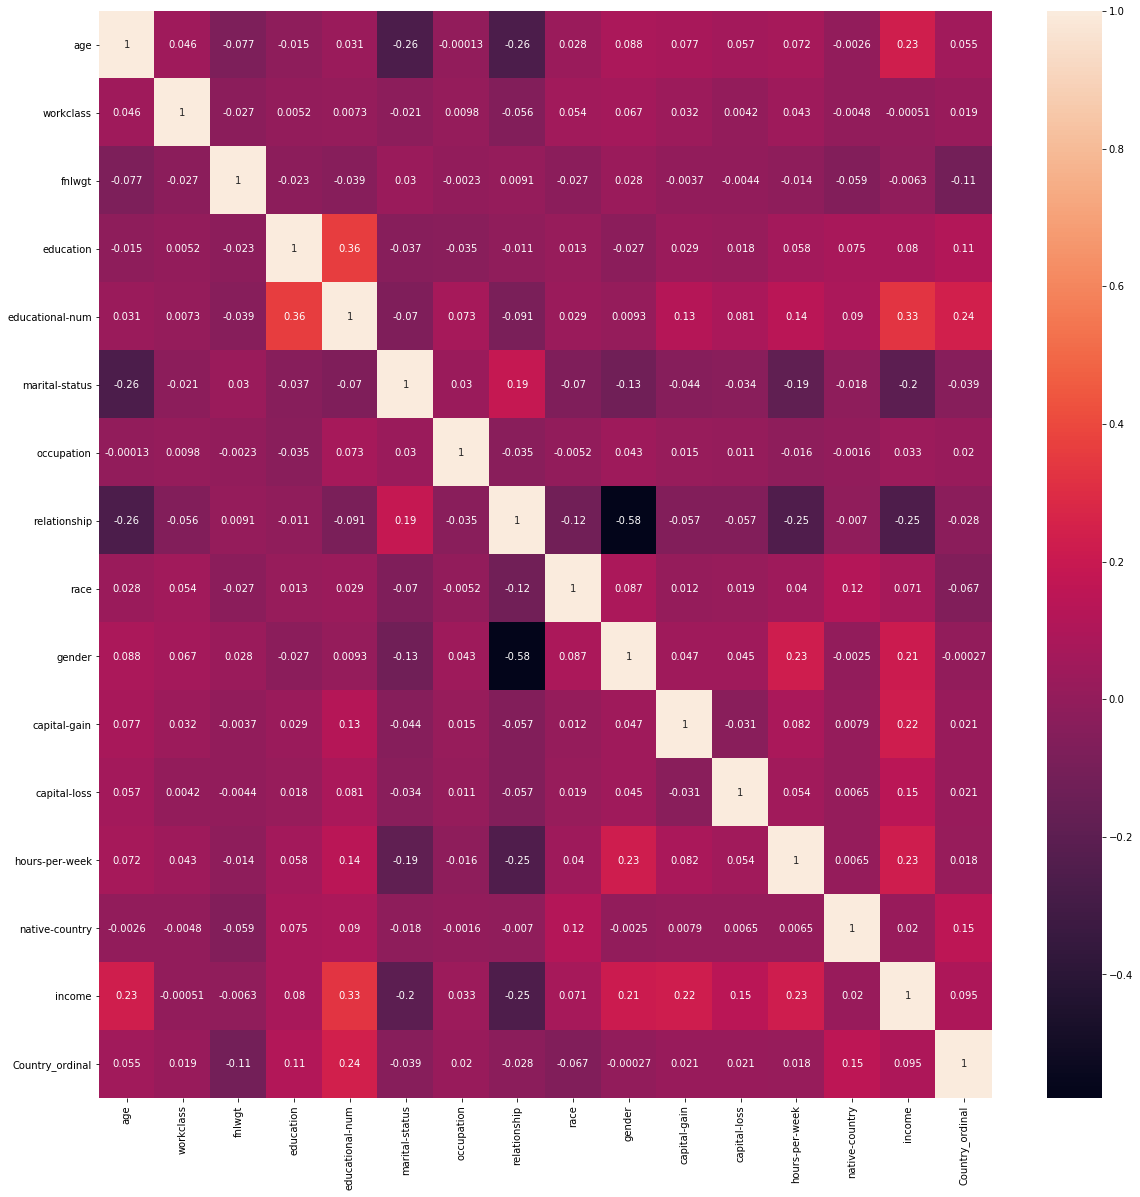

In [28]:
corr = data.corr()
top_features = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_features].corr(), annot=True)

## Correlation Analysis:
     1.income is more correlated with hours-per-week, educational-num and age
     2.relationship and marital status is strongly negatively correlated to income

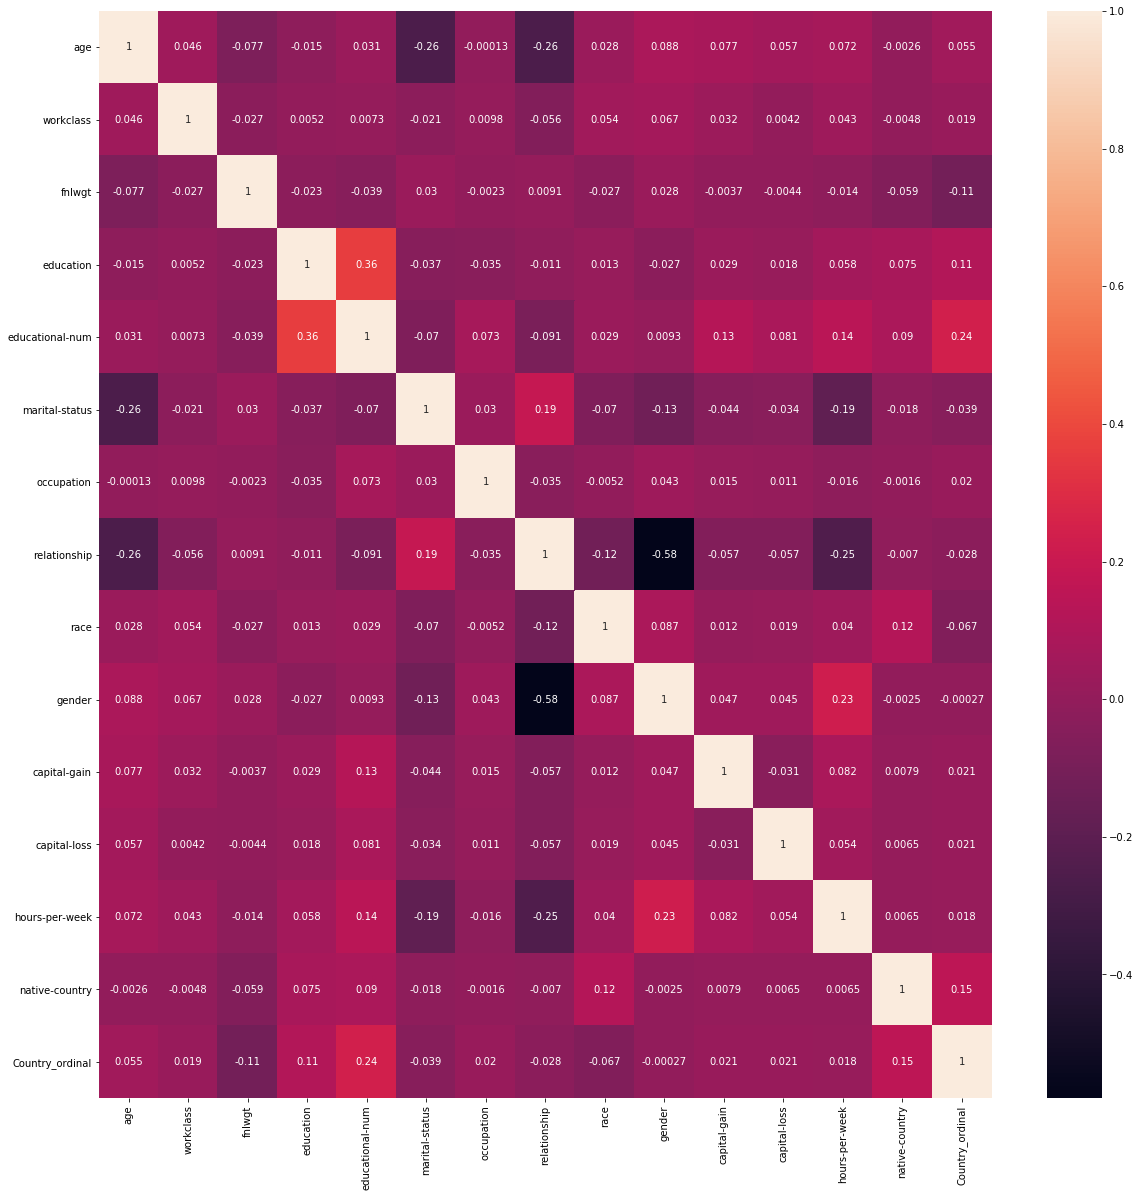

In [29]:
# Here we are seeing that is there are any features which are highly correlated with each other
# That's why here we are just dropping dependant feature (target feature)
corr = data.drop('income',axis=1).corr()
top_features = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_features].corr(), annot=True)

### According to above correlation matrix we can see that there are some features which are highly correlated with each other
### More than 50% Correlation between each other will be harmful for our model
### These features are relationship and gender so we can remove any one of the feature

In [30]:
X = data.drop(['income', 'relationship', 'native-country', 'fnlwgt'], axis = 1)
X.head()

,age,workclass,education,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,Country_ordinal
0,25,3,1,7,4,6,2,1,0,0,40,22
1,38,3,11,9,2,4,4,1,0,0,50,22
2,28,1,7,12,2,10,4,1,0,0,40,22
3,44,3,15,10,2,6,2,1,7688,0,40,22
4,18,3,15,10,4,9,4,0,0,0,30,22


In [31]:
Y = data.income
Y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int32

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Model Selection

## Decision Tree Classifier

# INTRODUCTION

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model_dc = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=2, min_samples_split=10).fit(X_train, Y_train)

In [35]:
pred_dc = model_dc.predict(X_test)

In [36]:
cm_dc = confusion_matrix(Y_test, pred_dc)
cm_dc

array([[7144,  335],
       [1005, 1285]], dtype=int64)

In [37]:
acc_dc = accuracy_score(Y_test, pred_dc)
acc_dc

0.8628314054662709

In [38]:
## KFold will provide train/test indices to split data into train and test sets. 
## It will split the dataset into k consecutive folds
kfold = KFold(n_splits=10, random_state=22)
kfold

c:\program files\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KFold(n_splits=10, random_state=22, shuffle=False)

In [39]:
result_dc = cross_val_score(model_dc, X, Y, cv=10, scoring='accuracy')
result_dc

array([0.8569089 , 0.85588536, 0.85913186, 0.8531941 , 0.85913186,
       0.85667486, 0.86015561, 0.85667486, 0.86302211, 0.85851761])

In [40]:
result_dc.mean()

0.8579297134670728

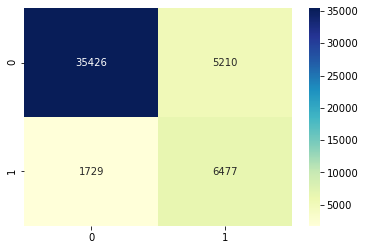

In [41]:
model_pred_dc = cross_val_predict(model_dc, X, Y, cv=10)
sns.heatmap(confusion_matrix(model_pred_dc, Y), cmap="YlGnBu", annot=True, fmt="3.0f")

## Predictions On Training Dataset

In [42]:
train_dc = cross_val_score(model_dc, X_train, Y_train, cv=10, scoring='accuracy')
train_dc

array([0.86310133, 0.86028659, 0.84160696, 0.85410801, 0.86101868,
       0.86178654, 0.85666752, 0.85513181, 0.85487586, 0.85794727])

In [43]:
train_dc.mean()

0.8566530587437345

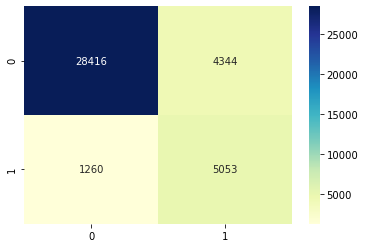

In [44]:
train_pred = cross_val_predict(model_dc, X_train, Y_train, cv=10)
sns.heatmap(confusion_matrix(train_pred, Y_train), cmap="YlGnBu", annot=True, fmt="3.0f")

# Predictions On Testing Dataset

In [45]:
test_dc = cross_val_score(model_dc, X_test, Y_test, cv=10, scoring='accuracy')
test_dc

array([0.85261003, 0.8618219 , 0.86079836, 0.85772774, 0.84032753,
       0.82599795, 0.86796315, 0.85363357, 0.86898669, 0.86680328])

In [46]:
test_dc.mean()

0.8556670218299578

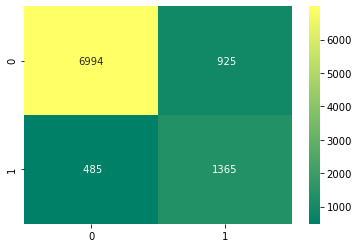

In [47]:
test_pred = cross_val_predict(model_dc, X_test, Y_test, cv=10)
sns.heatmap(confusion_matrix(test_pred, Y_test), cmap='summer', annot=True, fmt='4.0f')

## Random Forest Classifier

# INTRODUCTION
It is an ensemble tree-based learning algorithm. The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object.Ensemble algorithms are those which combines more than one algorithms of same or different kind for classifying objects. For example, running prediction over Naive Bayes, SVM and Decision Tree and then taking vote for final consideration of class for test object.

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model_rf = RandomForestClassifier(criterion='gini', max_depth=10, n_estimators=800, oob_score=True, n_jobs=-1, 
                                  min_samples_leaf=1, min_samples_split=10, random_state=42, max_features='auto')

In [50]:
model_rf.fit(X_train, Y_train)
pred_rf = model_rf.predict(X_test)

In [51]:
cm_rf = confusion_matrix(pred_rf, Y_test)
cm_rf

array([[7171, 1036],
       [ 308, 1254]], dtype=int64)

In [52]:
acc_rf = accuracy_score(pred_rf, Y_test)
acc_rf

0.8624219469751254

In [53]:
result_rf = cross_val_score(model_rf, X, Y, cv=10, scoring="accuracy")
result_rf

array([0.85465711, 0.85486182, 0.85933661, 0.85339885, 0.85954136,
       0.85462735, 0.86199836, 0.85626536, 0.86404586, 0.86117936])

In [54]:
result_rf.mean()

0.857991205591001

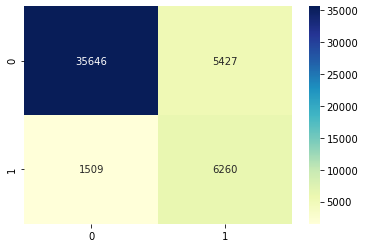

In [55]:
model_pred_rf = cross_val_predict(model_rf, X, Y, cv=10)
sns.heatmap(confusion_matrix(model_pred_rf, Y), cmap="YlGnBu", annot=True, fmt="3.0f")

## Predictions On Training Dataset

In [56]:
train_rf = cross_val_score(model_rf, X_train, Y_train, cv=10, scoring='accuracy')
print("Accuracy Of Training Dataset",train_rf.mean())

Accuracy Of Training Dataset 0.8564738865941219


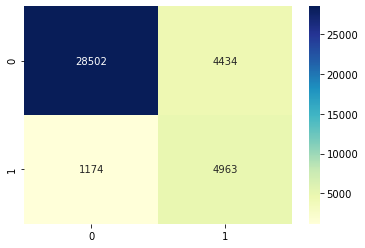

In [57]:
train_pred = cross_val_predict(model_rf, X_train, Y_train, cv=10)
sns.heatmap(confusion_matrix(train_pred, Y_train), cmap="YlGnBu", annot=True, fmt="3.0f")

## Predictions On Testing Dataset

In [58]:
test_rf = cross_val_score(model_rf, X_test, Y_test, cv=10, scoring='accuracy')
print("Accuracy Of Testing Dataset",test_rf.mean())

Accuracy Of Testing Dataset 0.8629349002466566


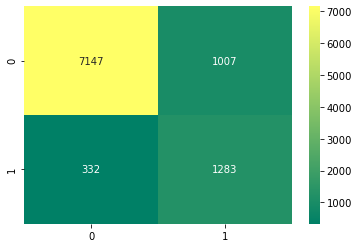

In [59]:
test_pred = cross_val_predict(model_rf, X_test, Y_test, cv=10)
sns.heatmap(confusion_matrix(test_pred, Y_test), cmap="summer", annot=True, fmt="3.0f")

# Support Vector Machine

# INTRODUCTION

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence


In [60]:
from sklearn.svm import SVC

In [61]:
model_svc = SVC().fit(X_train, Y_train)
pred_svc = model_svc.predict(X_test)

In [62]:
cm_svc = confusion_matrix(Y_test, pred_svc)
cm_svc

array([[7257,  222],
       [1667,  623]], dtype=int64)

In [63]:
acc_svc = accuracy_score(Y_test, pred_svc)
acc_svc

0.8066332275565564

In [64]:
result_svc = cross_val_score(model_svc, X, Y, cv=10, scoring='accuracy')
result_svc

array([0.80184237, 0.79836233, 0.80200655, 0.79914005, 0.80671581,
       0.8038493 , 0.80241605, 0.79832105, 0.80651106, 0.80773956])

In [65]:
result_svc.mean()

0.8026904134990114

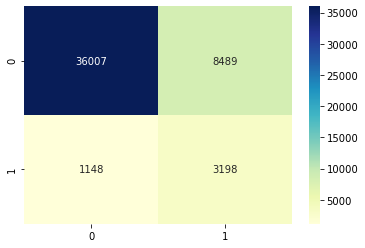

In [66]:
model_pred_svc = cross_val_predict(model_svc, X, Y, cv=10)
sns.heatmap(confusion_matrix(model_pred_svc, Y), cmap="YlGnBu", annot=True, fmt="3.0f")

## Predictions On Training Dataset

In [67]:
train_svc = cross_val_score(model_svc, X_train, Y_train, cv=10, scoring='accuracy')
print("Accuracy Of Training Dataset",train_svc.mean())

Accuracy Of Training Dataset 0.8014994017770901


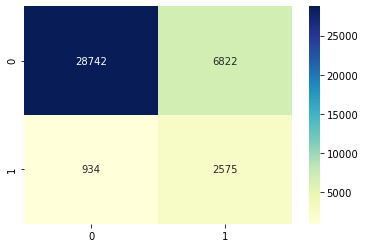

In [68]:
train_pred = cross_val_predict(model_svc, X_train, Y_train, cv=10)
sns.heatmap(confusion_matrix(train_pred, Y_train), cmap="YlGnBu", annot=True, fmt="3.0f")

## Predictions On Testing Dataset

In [69]:
test_svc = cross_val_score(model_svc, X_test, Y_test, cv=10, scoring='accuracy')
print("Accuracy Of Testing Dataset",test_svc.mean())

Accuracy Of Testing Dataset 0.805199087202376


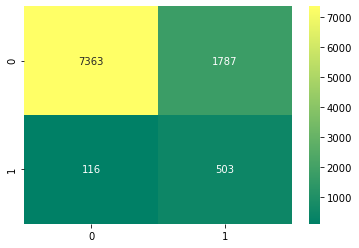

In [70]:
test_pred = cross_val_predict(model_svc, X_test, Y_test, cv=10)
sns.heatmap(confusion_matrix(test_pred, Y_test), cmap="summer", annot=True, fmt="3.0f")

# KNN Classifier

# INTRODUCTION 
K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set. We can understand its working with the help of following steps −

Step 1 − For implementing any algorithm, we need dataset. So during the first step of KNN, we must load the training as well as test data.

Step 2 − Next, we need to choose the value of K i.e. the nearest data points. K can be any integer.

Step 3 − For each point in the test data do the following −

3.1 − Calculate the distance between test data and each row of training data with the help of any of the method namely: Euclidean, Manhattan or Hamming distance. The most commonly used method to calculate distance is Euclidean.

3.2 − Now, based on the distance value, sort them in ascending order.

3.3 − Next, it will choose the top K rows from the sorted array.

3.4 − Now, it will assign a class to the test point based on most frequent class of these rows.

Step 4 − End

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
model_knn = KNeighborsClassifier(n_neighbors=4).fit(X_train, Y_train)
pred_knn = model_knn.predict(X_test)

In [73]:
cm_knn = confusion_matrix(Y_test, pred_knn)
cm_knn

array([[7004,  475],
       [1011, 1279]], dtype=int64)

In [74]:
acc_knn = accuracy_score(Y_test, pred_knn)
acc_knn

0.8478861705394616

In [75]:
result_knn = cross_val_score(model_knn, X, Y, cv=10, scoring='accuracy')
result_knn

array([0.84524053, 0.8419652 , 0.84336609, 0.8470516 , 0.84520885,
       0.8454136 , 0.84254709, 0.84418509, 0.85667486, 0.84520885])

In [76]:
result_knn.mean()

0.8456861751488158

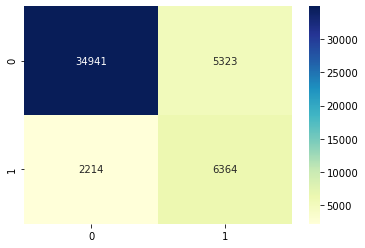

In [77]:
model_pred_knn = cross_val_predict(model_knn, X, Y, cv=10)
sns.heatmap(confusion_matrix(model_pred_knn, Y), cmap="YlGnBu", annot=True, fmt="3.0f")

## Predictions On Training Dataset

In [78]:
train_knn = cross_val_score(model_knn, X_train, Y_train, cv=10, scoring='accuracy')
print("Accuracy Of Training Dataset",train_knn.mean())

Accuracy Of Training Dataset 0.8429093818695101


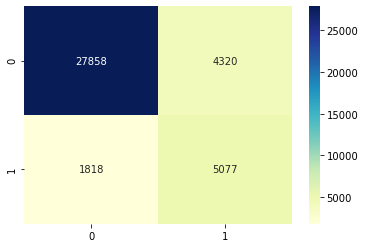

In [79]:
train_pred = cross_val_predict(model_knn, X_train, Y_train, cv=10)
sns.heatmap(confusion_matrix(train_pred, Y_train), cmap="YlGnBu", annot=True, fmt="3.0f")

## Predictions On Testing Dataset

In [80]:
test_knn = cross_val_score(model_knn, X_test, Y_test, cv=10, scoring='accuracy')
print("Accuracy Of Testing Dataset",test_knn.mean())

Accuracy Of Testing Dataset 0.83990196654194


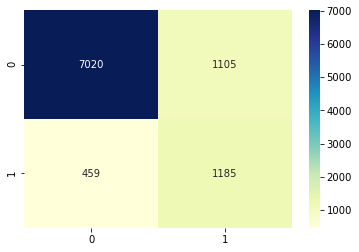

In [81]:
test_pred = cross_val_predict(model_knn, X_test, Y_test, cv=10)
sns.heatmap(confusion_matrix(test_pred, Y_test), cmap="YlGnBu", annot=True, fmt="3.0f")

# Gaussian Naive Bayes

# INTRODUCTION

Naive Bayes algorithms is a classification technique based on applying Bayes’ theorem with a strong assumption that all the predictors are independent to each other. In simple words, the assumption is that the presence of a feature in a class is independent to the presence of any other feature in the same class.

In [82]:
from sklearn.naive_bayes import GaussianNB

In [83]:
model_nb = GaussianNB().fit(X_train, Y_train)
pred_nb = model_nb.predict(X_test)

In [84]:
cm_nb = confusion_matrix(Y_test, pred_knn)
cm_nb

array([[7004,  475],
       [1011, 1279]], dtype=int64)

In [85]:
acc_nb = accuracy_score(Y_test, pred_nb)
acc_nb

0.8050977582147609

In [86]:
result_nb = cross_val_score(model_nb, X, Y, cv=10, scoring='accuracy')
result_nb

array([0.8024565 , 0.79877175, 0.79832105, 0.80036855, 0.80200655,
       0.7997543 , 0.79709255, 0.79873055, 0.8038493 , 0.80835381])

In [87]:
result_nb.mean()

0.8009704908220773

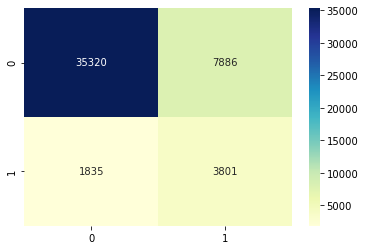

In [88]:
model_pred_nb = cross_val_predict(model_nb, X, Y, cv=10)
sns.heatmap(confusion_matrix(model_pred_nb, Y), cmap="YlGnBu", annot=True, fmt="3.0f")

## Predictions On Training Dataset

In [89]:
train_nb = cross_val_score(model_nb, X_train, Y_train, cv=10, scoring='accuracy')
print("Accuracy Of Training Dataset",train_nb.mean())

Accuracy Of Training Dataset 0.7993752912849126


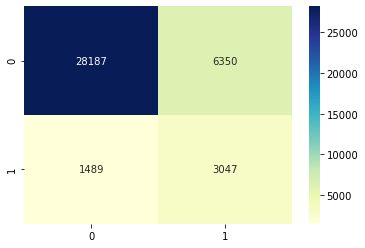

In [90]:
train_pred = cross_val_predict(model_nb, X_train, Y_train, cv=10)
sns.heatmap(confusion_matrix(train_pred, Y_train), cmap="YlGnBu", annot=True, fmt="3.0f")

## Predictions On Testing Dataset

In [91]:
test_nb = cross_val_score(model_nb, X_test, Y_test, cv=10, scoring='accuracy')
print("Accuracy Of Testing Dataset",test_nb.mean())

Accuracy Of Testing Dataset 0.8059175587697368


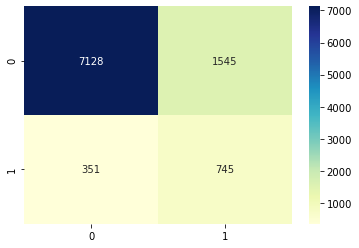

In [92]:
test_pred = cross_val_predict(model_nb, X_test, Y_test, cv=10)
sns.heatmap(confusion_matrix(test_pred, Y_test), cmap="YlGnBu", annot=True, fmt="3.0f")

# AdaBoost Ensemble Technique

# INTRODUCTION

At a high level, AdaBoost is similar to Random Forest in that they both tally up the predictions made by each decision trees within the forest to decide on the final classification. There are however, some subtle differences. For instance, in AdaBoost, the decision trees have a depth of 1 . In addition, the predictions made by each decision tree have varying impact on the final prediction made by the model.

In [93]:
from sklearn.ensemble import AdaBoostClassifier

In [94]:
model_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=1600, learning_rate=1).fit(X_train, Y_train)
pred_ada = model_ada.predict(X_test)

In [95]:
cm_ada = confusion_matrix(Y_test, pred_ada)
cm_ada

array([[7070,  409],
       [ 800, 1490]], dtype=int64)

In [96]:
acc_ada = accuracy_score(Y_test, pred_ada)
acc_ada

0.8762411710512846

0.8712583608080026


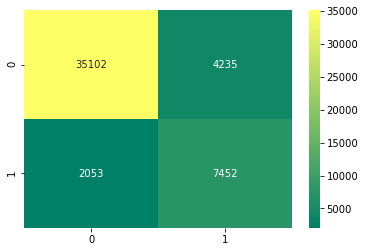

In [97]:
result_ada = cross_val_score(model_ada, X, Y, cv=10, scoring='accuracy')
print(result_ada.mean())
model_pred_ada = cross_val_predict(model_ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(model_pred_ada, Y), cmap="summer", annot=True, fmt="3.0f")

## Predictions On Training Dataset

In [98]:
train_ada = cross_val_score(model_ada, X_train, Y_train, cv=10, scoring='accuracy')
print("Accuracy Of Training Dataset",train_ada.mean())

Accuracy Of Training Dataset 0.8703196949338234


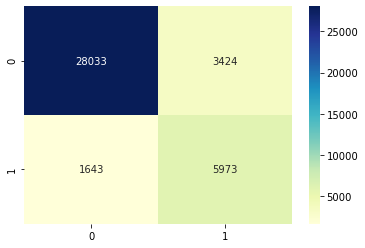

In [99]:
train_pred = cross_val_predict(model_ada, X_train, Y_train, cv=10)
sns.heatmap(confusion_matrix(train_pred, Y_train), cmap="YlGnBu", annot=True, fmt="3.0f")

## Predictions On Testing Dataset

In [100]:
test_ada = cross_val_score(model_ada, X_test, Y_test, cv=10, scoring='accuracy')
print("Accuracy Of Testing Dataset",test_ada.mean())

Accuracy Of Testing Dataset 0.8719424845210328


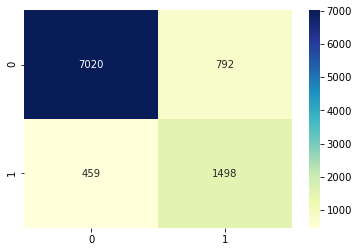

In [101]:
test_pred = cross_val_predict(model_ada, X_test, Y_test, cv=10)
sns.heatmap(confusion_matrix(test_pred, Y_test), cmap="YlGnBu", annot=True, fmt="3.0f")

# Gradient Boosting Classifier

# INTRODUCTION

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Gradient boosting models are becoming popular because of their effectiveness at classifying complex datasets, and have recently been used to win many Kaggle data science competitions.

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
model_gb = GradientBoostingClassifier().fit(X_train, Y_train)
pred_gb = model_gb.predict(X_test)

In [104]:
cm_gb = confusion_matrix(Y_test, pred_gb)
cm_gb

array([[7115,  364],
       [ 894, 1396]], dtype=int64)

In [105]:
acc_gb = accuracy_score(Y_test, pred_gb)
acc_gb

0.8712253045347528

0.8646656640822454


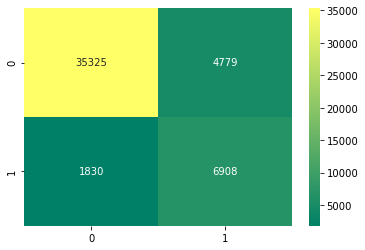

In [106]:
result_gb = cross_val_score(model_gb, X, Y, cv=10, scoring='accuracy')
print(result_gb.mean())
model_pred_gb = cross_val_predict(model_gb, X, Y, cv=10)
sns.heatmap(confusion_matrix(model_pred_gb, Y), cmap="summer", annot=True, fmt="3.0f")

## Predictions On Training Dataset

In [107]:
train_gb = cross_val_score(model_gb, X_train, Y_train, cv=10, scoring='accuracy')
print("Accuracy Of Training Dataset",train_gb.mean())

Accuracy Of Training Dataset 0.8634607162589573


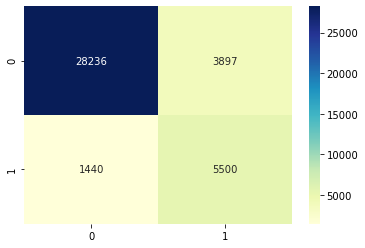

In [108]:
train_pred = cross_val_predict(model_gb, X_train, Y_train, cv=10)
sns.heatmap(confusion_matrix(train_pred, Y_train), cmap="YlGnBu", annot=True, fmt="3.0f")

## Predictions On Testing Dataset

In [109]:
test_gb = cross_val_score(model_gb, X_test, Y_test, cv=10, scoring='accuracy')
print("Accuracy Of Testing Dataset",test_gb.mean())

Accuracy Of Testing Dataset 0.8687691914022517


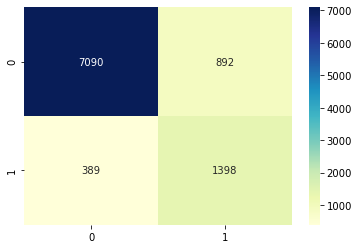

In [110]:
test_pred = cross_val_predict(model_gb, X_test, Y_test, cv=10)
sns.heatmap(confusion_matrix(test_pred, Y_test), cmap="YlGnBu", annot=True, fmt="3.0f")

# XGBoost Clasifier

# INTRODUCTION

XGBoost is one of the most popular machine learning algorithm these days. 
Regardless of the type of prediction task at hand; regression or classification.
XGBoost is well known to provide better solutions than other machine learning algorithms. 

In [111]:
from xgboost import XGBClassifier

In [112]:
model_xgb = XGBClassifier(learning_rate = 0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
     objective = 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [113]:
model_xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [114]:
pred_xgb = model_xgb.predict(X_test) 

In [115]:
acc_xgb = accuracy_score(Y_test, pred_xgb)
acc_xgb

0.8743986078411301

In [116]:
result_xgb = cross_val_score(model_xgb, X, Y, cv=10, scoring='accuracy')
result_xgb

array([0.8667349 , 0.8716479 , 0.86895987, 0.86691237, 0.87387387,
       0.86752662, 0.87469287, 0.86855037, 0.87694513, 0.87366912])

In [117]:
result_xgb.mean()

0.8709513025633806

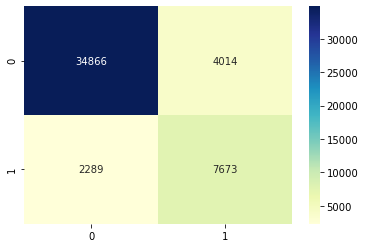

In [118]:
model_pred_xgb = cross_val_predict(model_xgb, X, Y, cv=10)
sns.heatmap(confusion_matrix(model_pred_xgb, Y), cmap="YlGnBu", annot=True, fmt="3.0f")

## Predictions On Training Dataset

Accuracy Of Training Dataset 0.8685025027907027


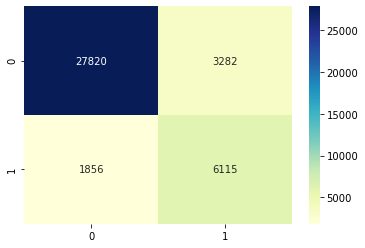

In [119]:
train_xgb = cross_val_score(model_xgb, X_train, Y_train, cv=10, scoring='accuracy')
print("Accuracy Of Training Dataset",train_xgb.mean())

train_pred = cross_val_predict(model_xgb, X_train, Y_train, cv=10)
sns.heatmap(confusion_matrix(train_pred, Y_train), cmap="YlGnBu", annot=True, fmt="3.0f")

## Predictions On Testing Dataset

Accuracy Of Testing Dataset 0.8575083477356242


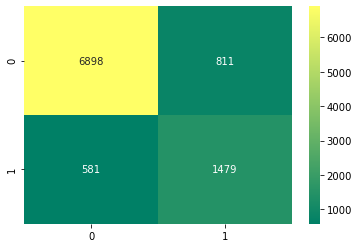

In [120]:
test_xgb = cross_val_score(model_xgb, X_test, Y_test, cv=10, scoring='accuracy')
print("Accuracy Of Testing Dataset",test_xgb.mean())

test_pred = cross_val_predict(model_xgb, X_test, Y_test, cv=10)
sns.heatmap(confusion_matrix(test_pred, Y_test), cmap="summer", annot=True, fmt="3.0f")

# Light Gradient Boosting Classifier

# Introduction

Light gradient boosting is one of the most efficient and fast algorithm.
Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm.
Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms 
split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, 
the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much 
better accuracy which can rarely be achieved by any of the existing boosting algorithms

In [121]:
import lightgbm as lgb
model_lgb = lgb.LGBMClassifier(n_estimators=12000, max_depth=1, learning_rate=1)

In [122]:
model_lgb.fit(X_train, Y_train)

LGBMClassifier(learning_rate=1, max_depth=1, n_estimators=12000)

In [123]:
pred_lgb = model_lgb.predict(X_test)

In [124]:
cm_lgb = confusion_matrix(Y_test, pred_lgb)
cm_lgb

array([[7078,  401],
       [ 782, 1508]], dtype=int64)

In [125]:
acc_lgb = accuracy_score(Y_test, pred_lgb)
acc_lgb

0.8789026512437301

In [126]:
result_lgb = cross_val_score(model_lgb, X, Y, cv=10, scoring="accuracy")
result_lgb.mean()

0.8719135824202354

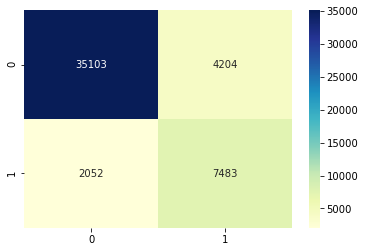

In [127]:
model_pred_lgb = cross_val_predict(model_lgb, X, Y, cv=10)
sns.heatmap(confusion_matrix(model_pred_lgb, Y), cmap="YlGnBu", annot=True, fmt="3.0f")

## Predictions On Training Dataset

Accuracy Of Training Dataset 0.8704220359803507


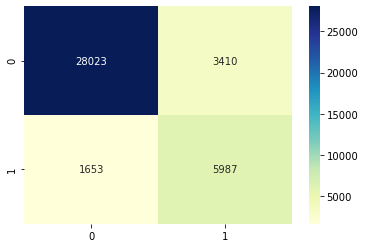

In [128]:
train_lgb = cross_val_score(model_lgb, X_train, Y_train, cv=10, scoring='accuracy')
print("Accuracy Of Training Dataset",train_lgb.mean())

train_pred = cross_val_predict(model_lgb, X_train, Y_train, cv=10)
sns.heatmap(confusion_matrix(train_pred, Y_train), cmap="YlGnBu", annot=True, fmt="3.0f")

## Predictions On Testing Dataset

Accuracy Of Training Dataset 0.8708163791801601


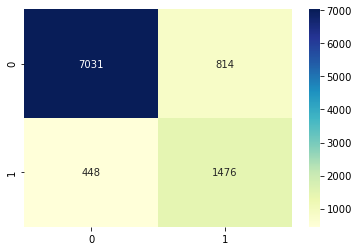

In [129]:
test_lgb = cross_val_score(model_lgb, X_test, Y_test, cv=10, scoring='accuracy')
print("Accuracy Of Training Dataset",test_lgb.mean())

test_pred = cross_val_predict(model_lgb, X_test, Y_test, cv=10)
sns.heatmap(confusion_matrix(test_pred, Y_test), cmap="YlGnBu", annot=True, fmt="3.0f")

# Logistic Regression

# INTRODUCTION

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. ... Logistic regression transforms its output using the logistic sigmoid function to return a probability value.

In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
model_lg = LogisticRegression().fit(X_train, Y_train)

c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [132]:
pred_lg = model_lg.predict(X_test)

In [133]:
cm_lg = confusion_matrix(Y_test, pred_lg)
cm_lg

array([[7038,  441],
       [1561,  729]], dtype=int64)

In [134]:
acc_lg = accuracy_score(Y_test, pred_lg)
acc_lg

0.7950660251816972

In [135]:
result_lg = cross_val_score(model_lg, X, Y, cv=10, scoring="accuracy")
result_lg.mean()

c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

0.7908358963783734

c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

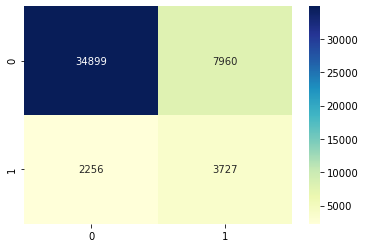

In [136]:
model_pred_lg = cross_val_predict(model_lg, X, Y, cv=10)
sns.heatmap(confusion_matrix(model_pred_lg, Y), cmap="YlGnBu", annot=True, fmt="3.0f")

## Predictions On Training Dataset

c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

Accuracy Of Training Dataset 0.7898035871892536


c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

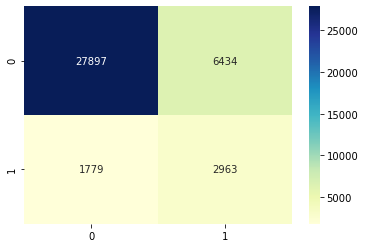

In [137]:
train_lg = cross_val_score(model_lg, X_train, Y_train, cv=10, scoring='accuracy')
print("Accuracy Of Training Dataset",train_lg.mean())

train_pred = cross_val_predict(model_lg, X_train, Y_train, cv=10)
sns.heatmap(confusion_matrix(train_pred, Y_train), cmap="YlGnBu", annot=True, fmt="3.0f")

## Predictions On Testing Dataset

c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

Accuracy Of Training Dataset 0.796499823816635


c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

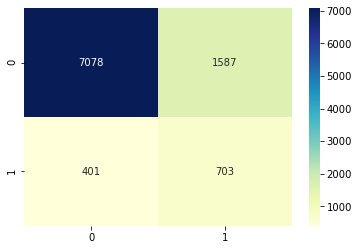

In [138]:
test_lg = cross_val_score(model_lg, X_test, Y_test, cv=10, scoring='accuracy')
print("Accuracy Of Training Dataset",test_lg.mean())

test_pred = cross_val_predict(model_lg, X_test, Y_test, cv=10)
sns.heatmap(confusion_matrix(test_pred, Y_test), cmap="YlGnBu", annot=True, fmt="3.0f")

# Model Evaluation

In [139]:
models = pd.DataFrame({
    "Model": ['Decision Tree', 'Random Forest', 'Support Vector Machine', 'KNN', 'Naive Bayes', 'Ada Boost', 'Gradient Boosting', 'XGBoost Classifier', 'Light Gradient Boosting', 'Logistic Regression'],
    'FullScore': [result_dc.mean(), result_rf.mean(), result_svc.mean(), result_knn.mean(), result_nb.mean(), result_ada.mean(), result_gb.mean(), result_xgb.mean(), result_lgb.mean(), result_lg.mean()],
    'TrainScore': [train_dc.mean(), train_rf.mean(), train_svc.mean(), train_knn.mean(), train_nb.mean(), train_ada.mean(), train_gb.mean(), train_xgb.mean(), train_lgb.mean(), train_lg.mean()],
    'TestScore': [test_dc.mean(), test_rf.mean(), test_svc.mean(), test_knn.mean(), test_nb.mean(), test_ada.mean(), test_gb.mean(), train_xgb.mean(), test_lgb.mean(), test_lg.mean()]
})

In [140]:
models

,Model,FullScore,TrainScore,TestScore
0,Decision Tree,0.857930,0.856653,0.855667
1,Random Forest,0.857991,0.856474,0.862935
2,Support Vector Machine,0.802690,0.801499,0.805199
3,KNN,0.845686,0.842909,0.839902
4,Naive Bayes,0.800970,0.799375,0.805918
5,Ada Boost,0.871258,0.870320,0.871942
6,Gradient Boosting,0.864666,0.863461,0.868769
7,XGBoost Classifier,0.870951,0.868503,0.868503
8,Light Gradient Boosting,0.871914,0.870422,0.870816
9,Logistic Regression,0.790836,0.789804,0.796500


In [141]:
models.sort_values(by='FullScore', ascending=False)

,Model,FullScore,TrainScore,TestScore
8,Light Gradient Boosting,0.871914,0.870422,0.870816
5,Ada Boost,0.871258,0.870320,0.871942
7,XGBoost Classifier,0.870951,0.868503,0.868503
6,Gradient Boosting,0.864666,0.863461,0.868769
1,Random Forest,0.857991,0.856474,0.862935
0,Decision Tree,0.857930,0.856653,0.855667
3,KNN,0.845686,0.842909,0.839902
2,Support Vector Machine,0.802690,0.801499,0.805199
4,Naive Bayes,0.800970,0.799375,0.805918
9,Logistic Regression,0.790836,0.789804,0.796500
